In [0]:
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
img = cv2.imread('moon.tif', 0)
#img= cv2.resize(img,(256,256))
#img.shape

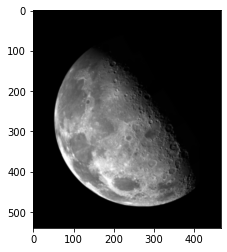

In [3]:
plt.imshow(img, cmap='gray')

In [0]:
def filterImg(img, filter):
  pad_rows=int((filter.shape[0]-1)/2)
  pad_cols=int((filter.shape[1]-1)/2)
  
  #print(sum(sum(filter)))
  fil_sum=filter.shape[0]*filter.shape[1]
  total=0
  padImg = cv2.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv2.BORDER_CONSTANT ,0)
  fil_img = np.zeros(img.shape,dtype=int)
  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      for row_fil in range(filter.shape[0]):
        for col_fil in range(filter.shape[1]):
          total+=filter[row_fil,col_fil]*padImg[row_fil+row,col_fil+col]
      #if (total/(fil_sum)!= NaN)
      fil_img[row,col]=int(total/(fil_sum)) 
      total=0
  cv2_imshow(fil_img)
  #print(padImg.shape)
  return fil_img


In [0]:
blurFilter= np.array(([1, 1, 1 ],
                      [1, 1, 1 ],
                      [1, 1, 1 ]))

In [6]:
blurFilter

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

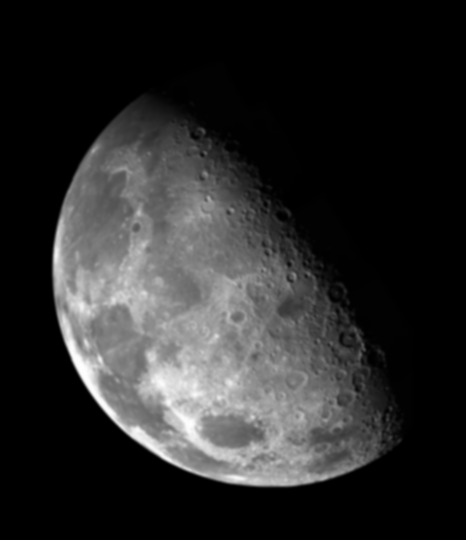

In [7]:
blurImg=filterImg(img,blurFilter)

In [0]:
gmask = img - blurImg

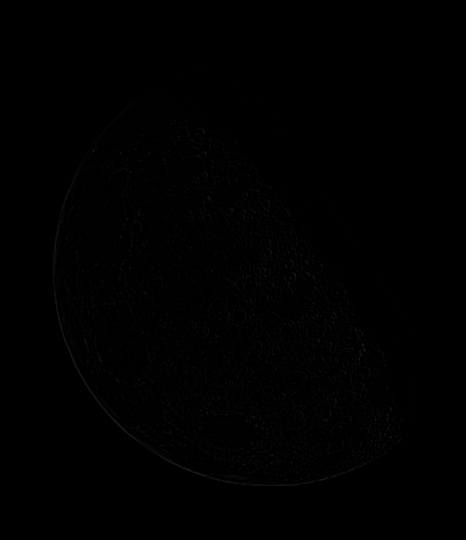

In [9]:
cv2_imshow(gmask)

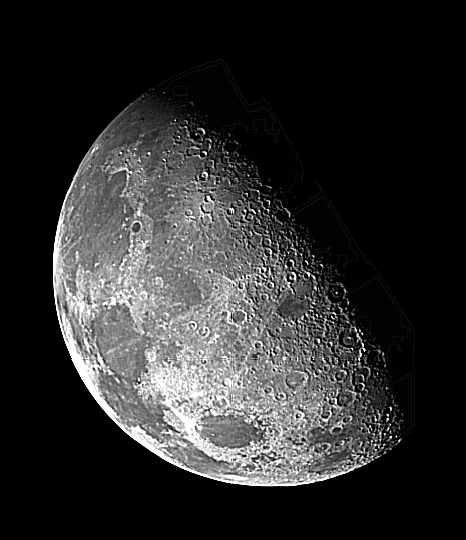

In [42]:
k = 12
finalImg=img+ k * gmask
cv2_imshow(finalImg)

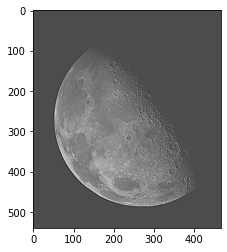

In [11]:
# Just for satisfaction
plt.imshow(finalImg, cmap='gray')

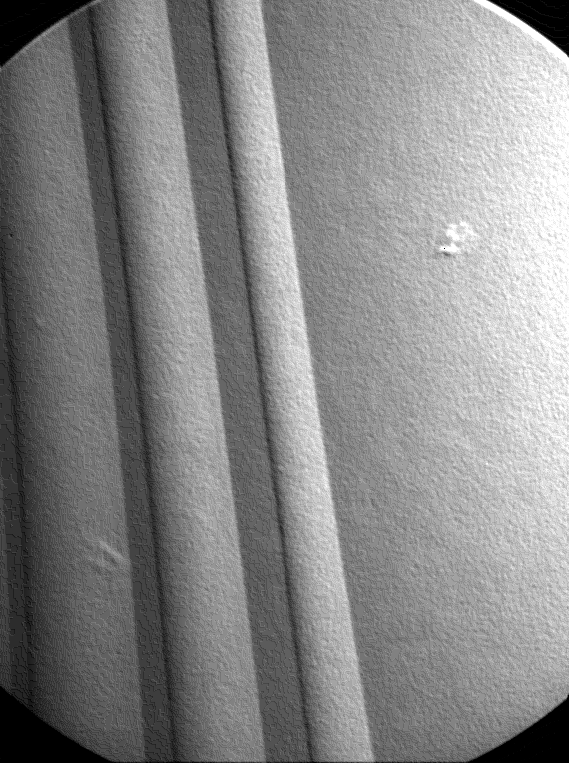

In [12]:
#------------------------ Task 2 ------------------
img2=cv2.imread('blade.tif',0)
cv2_imshow(img2)

In [0]:
filter2=np.array(([1 , 1, 1],
                  [1, -8, 1],
                  [1,1,1]))


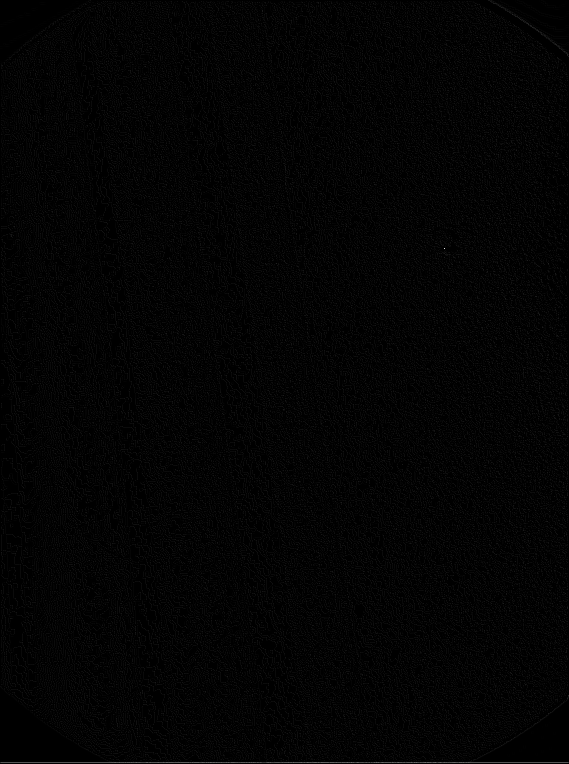

In [14]:
laplacianImg=filterImg(img2,filter2)

In [0]:
def getHistogramArray(grayImg):
  hist = np.zeros((256), dtype='uint32')
  for row in range(grayImg.shape[0]):
    for col in range(grayImg.shape[1]):
      hist[grayImg[row][col]]+=1
  return hist

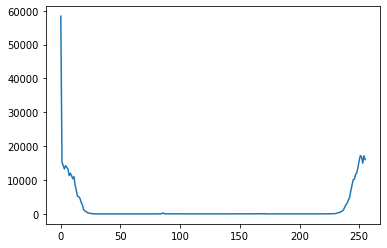

In [16]:
lapImgHist = getHistogramArray(laplacianImg)
plt.plot(lapImgHist)
plt.show()

In [0]:
def applyMask(img , threshold):
  mask=np.zeros((img.shape))
  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if(img[row,col]>threshold):
          mask[row][col]=255
        else:
          mask[row][col]=0
  return mask;


In [0]:
mask = applyMask(laplacianImg, 220)

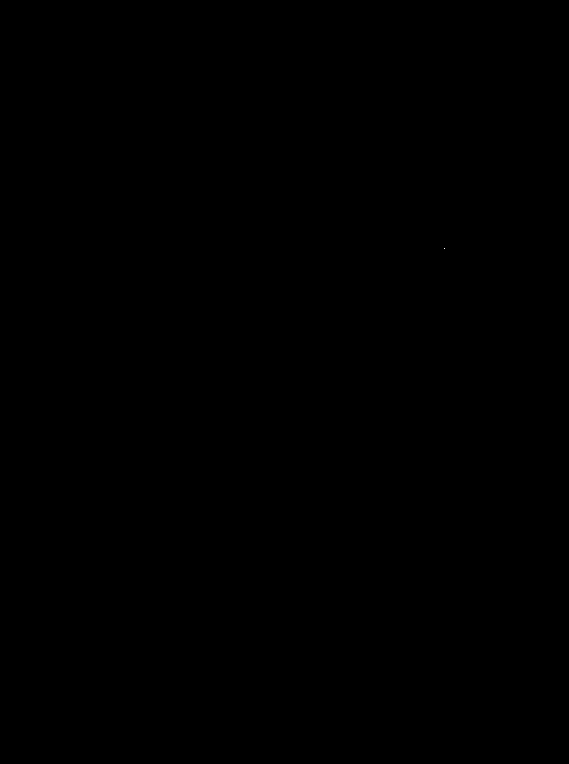

In [39]:
cv2_imshow(mask)

In [0]:

resImg=np.bitwise_or(mask,img2)
cv2_imshow(resImg)

In [0]:
# -----Task 3 -------------------------
img3= cv2.imread('building.tif',0)
img4= cv2.imread('wirebond.tif',0)

vertFilter=np.array(([-1 , 2 , -1],
                  [-1,  2, -1],
                  [ -1, 2, -1] ))

horizFilter=np.array(([-1 , -1 , -1],
                  [2,  2, 2],
                  [ -1, -1, -1] ))

northFilter = np.array(([ -3,-3,5],
                        [-3, 0 , 5],
                        [-3, -3 , 5]))

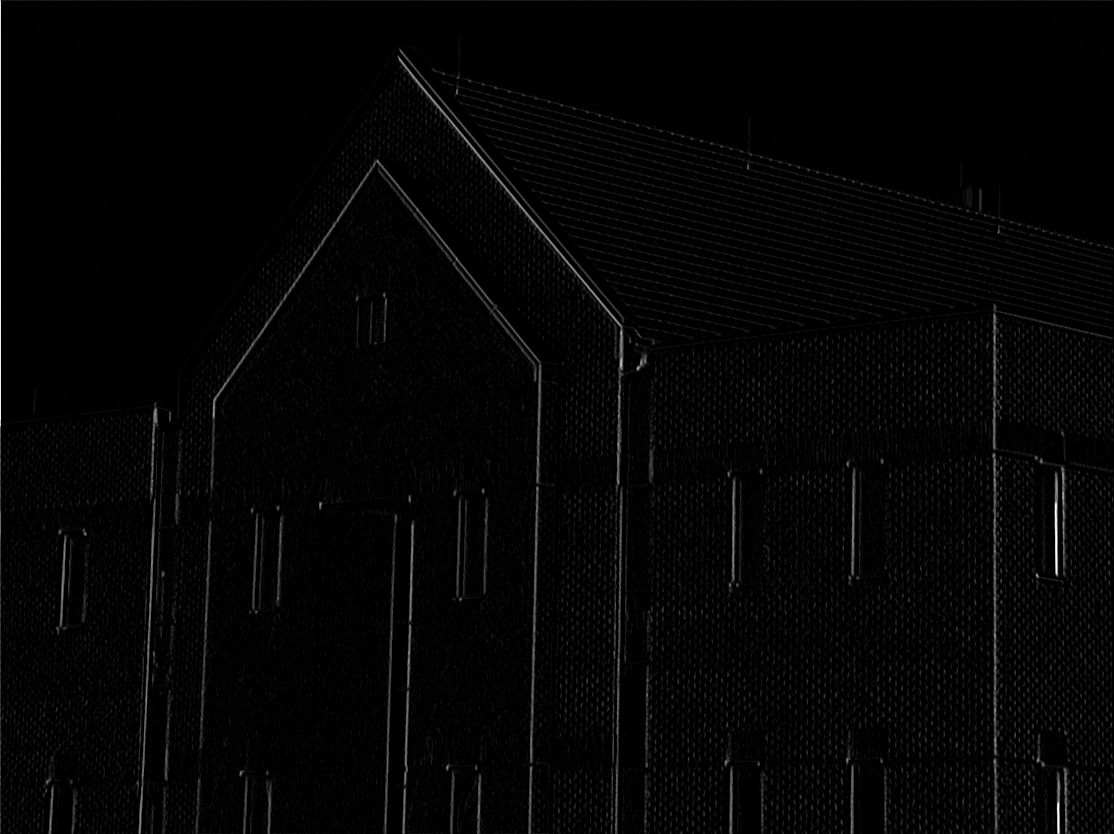

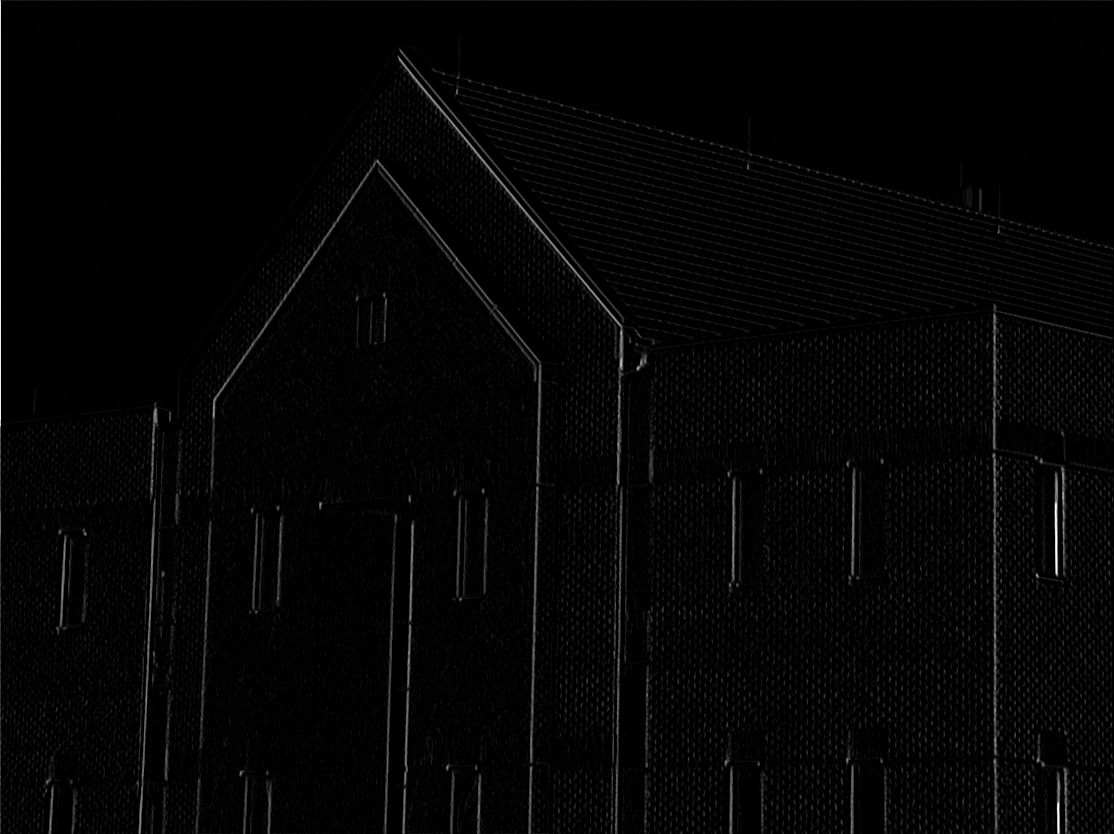

In [31]:
filterImg3 = filterImg(img3, northFilter)
cv2_imshow(filterImg3)

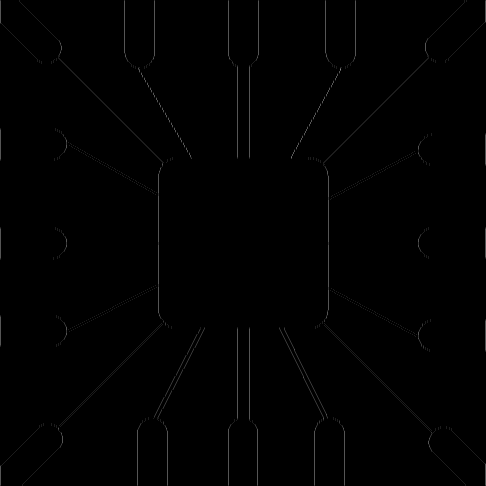

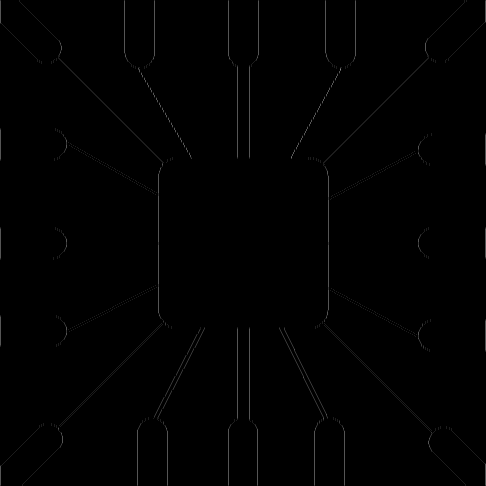

In [40]:
filterImg4 = filterImg(img4, vertFilter)
cv2_imshow(filterImg4)